# Phutball PyTorch Implementation
This notebook is to develop a (not-so-simple) function that takes as input a PyTorch tensor representing the game stat, and as output returns a tensor representing the possible next states.

State representation:
    - A tensor of shape (3, 15, 19) and dtype Boolean with the last two dimensions representing the board, and the first dimension the "channels".
    - Channel 1: Whether a player is located there
    - Channel 2: Whether the ball is located there
    - Channel 3: Whether a player located there is jumpable.
    
For simplicty, the case where the ball is off the board need not be considered. If a state can be off the board **to the right only**, a special return value should be given indicated this.

The bot will always be assumed to be playing to the **right**.

## Version 1: No implementation of Channel 3

## Utilities
Tools to construct and visualize the board states. Not meant to be performant.

In [ ]:
import matplotlib.pyplot as plt
plt.ioff()

In [21]:
import numpy as np

In [36]:
from itertools import chain

In [41]:
import torch

In [29]:
class InvalidConfiguration(Exception):
  pass

In [42]:
BOARD_SHAPE = (15, 19)

In [54]:
def parseLocation(locStr):
  match = re.match('([A-HJ-P])(\d+)', locStr)
  if not match:
    raise

  row, col = match.groups()
  row = 'ABCDEFGHJKLMNOP'.index(row)
  col = int(col) - 1
  
  return row, col

In [46]:
import re

In [72]:
def createState(ballLoc, *playerLocs):
  ballChannel   = np.zeros(BOARD_SHAPE)
  playerChannel = np.zeros(BOARD_SHAPE)
  
  for (array, locs) in [(ballChannel, [ballLoc]), (playerChannel, playerLocs)]:
    for loc in locs:
      row, col = parseLocation(loc)
      array[row][col] = 1
  return torch.tensor(np.stack([playerChannel, ballChannel]), dtype = torch.bool)

In [73]:
a = createState('H10', 'A3')

In [78]:
a

tensor([[[False, False,  True, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, Fal

In [66]:
def visualize_state(tensor):
  plt.close() # save memory
  
  data = tensor.numpy()
  players = (data[0], 'black')
  ball    = (data[1], 'red')
  
  if (players[0] + ball[0]).max() > 1:
    raise InvalidConfiguration('Play and Ball collocated')
  elif ball[0].sum() != 1:
    raise InvalidConfiguration('Wrong number of balls')
  
  fig, ax = plt.subplots()
  ax.set_xlim([0.5  , 19.5])
  ax.set_ylim([-15.5, -0.5])
  ax.grid(True)
  ax.set_xticks(list(range(1,20)))
  ax.set_yticks(list(range(-15, 0)));
  ax.set_yticklabels('ABCDEFGHJKLMNOP'[::-1])

  ax.add_patch(plt.Circle((10, -12), 0.3, color='black'))

  for (array, color) in [players, ball]:
    for row in range(15):
      for col in range(19):
        if array[row][col]:
          ax.add_patch(plt.Circle((col+1, -(row+1)), 0.3, color=color))

  return fig

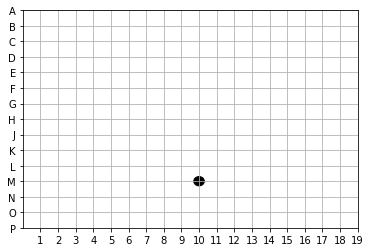

In [35]:
fig